In [1]:
!pip install torch torchaudio librosa transformers matplotlib soundfile


Sample Rate: 16000
Duration (sec): 7.584


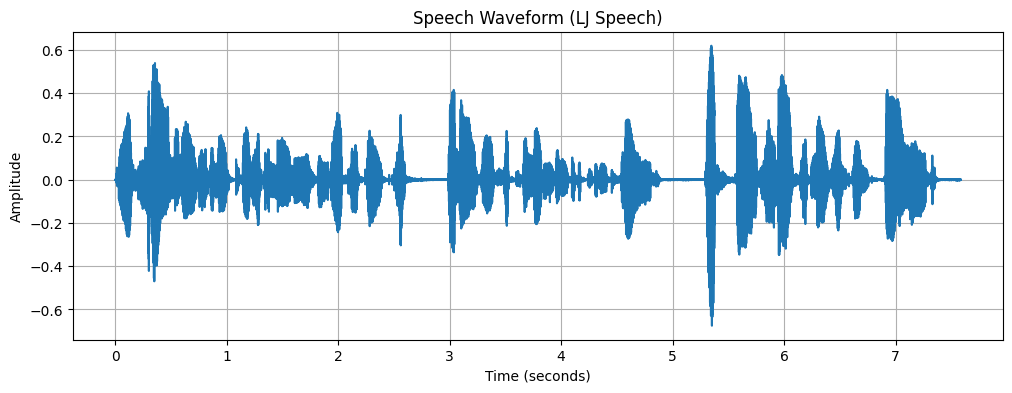

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Recognized Phonemes / Tokens:
THE EXAMINATION AND TESTIMONY OF THE EXPERTS ENABLED THE COMMISSION TO CONCLUDE THAT FIVE SHOTS MAY HAVE BEEN FIRED

Approx time per phoneme (sec): 0.3991578947368421

Extracted Phoneme Label: TO


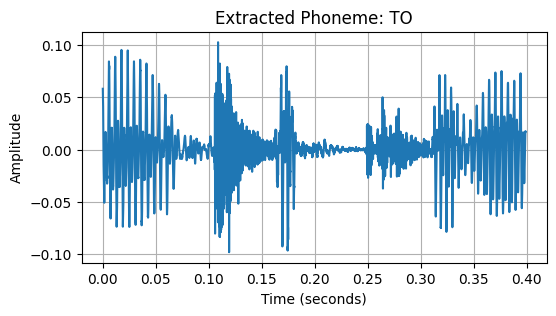


Extracted phoneme audio saved as extracted_phoneme.wav

Inference:
This is a CONSONANT sound.
• May be voiced or unvoiced
• Stop/fricative/nasal depending on articulation

Note: Phoneme boundaries are approximated due to CTC decoding.


In [ ]:
import torch
import torchaudio
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC

audio_path = "/content/LJ037-0171.wav"

signal, sr = librosa.load(audio_path, sr=16000, mono=True)

print("Sample Rate:", sr)
print("Duration (sec):", len(signal)/sr)

time = np.arange(len(signal)) / sr

plt.figure(figsize=(12,4))
plt.plot(time, signal)
plt.title("Speech Waveform (LJ Speech)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()
 
processor = Wav2Vec2Processor.from_pretrained(
    "facebook/wav2vec2-base-960h"
)
model = Wav2Vec2ForCTC.from_pretrained(
    "facebook/wav2vec2-base-960h"
)
model.eval()
 
inputs = processor(
    signal,
    sampling_rate=sr,
    return_tensors="pt",
    padding=True
)

with torch.no_grad():
    logits = model(inputs.input_values).logits

predicted_ids = torch.argmax(logits, dim=-1)

phonemes = processor.batch_decode(predicted_ids)

print("\nRecognized Phonemes / Tokens:")
print(phonemes[0])

tokens = phonemes[0].split()
num_tokens = len(tokens)

total_duration = len(signal) / sr
time_per_token = total_duration / num_tokens

print("\nApprox time per phoneme (sec):", time_per_token)

phoneme_index = 10  # example index

selected_phoneme = tokens[phoneme_index]
print("\nExtracted Phoneme Label:", selected_phoneme)

start_time = phoneme_index * time_per_token
end_time = (phoneme_index + 1) * time_per_token

start_sample = int(start_time * sr)
end_sample = int(end_time * sr)

phoneme_signal = signal[start_sample:end_sample]
 
plt.figure(figsize=(6,3))
plt.plot(
    np.arange(len(phoneme_signal)) / sr,
    phoneme_signal
)
plt.title(f"Extracted Phoneme: {selected_phoneme}")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()
 
sf.write(
    "extracted_phoneme2.wav",
    phoneme_signal,
    sr
)

print("\nExtracted phoneme audio saved as extracted_phoneme.wav")
 
print("\nInference:")
if selected_phoneme in ["A", "E", "I", "O", "U"]:
    print("This is a VOWEL sound.")
    print("• Voiced sound (vocal cords vibrate)")
    print("• Periodic waveform with higher amplitude")
else:
    print("This is a CONSONANT sound.")
    print("• May be voiced or unvoiced")
    print("• Stop/fricative/nasal depending on articulation")

print("\nNote: Phoneme boundaries are approximated due to CTC decoding.")
